In [2]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [3]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_exp1.csv")
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
print(data.shape)

(169271, 28)


In [4]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_noise.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data2=data2[data2.pxt<=0.06]
data2=data2.drop_duplicates()
print(data2.shape)

(169271, 28)


In [5]:
data=data[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]
data2=data2[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]

temp_merged=data.merge(data2,on=['pep','pxt'])
print(temp_merged.shape)


(169271, 14)


In [137]:
# temp_merged=temp_merged[temp_merged.pxt==temp_merged.pxt.unique()[0]]

In [6]:
# for c in ['delta1','delta2','i0','i1','i2']:
#     print(c, sum(temp_merged[c+"_x"] - temp_merged[c+"_y"]))

In [7]:
# temp_merged

In [8]:
# pd_pxt=100*abs(temp_merged.pxt - temp_merged.cpxt_y)/temp_merged.pxt
# pd_delta2=100*abs(temp_merged.delta2_x - temp_merged.delta2_y)/temp_merged.delta2_x

# df=pd.DataFrame([pd_pxt,pd_delta2]).transpose()
# df.columns=['pxt','delta2']
# # df=df[df.pxt<20]

In [9]:
# plt.scatter(df.pxt,df.delta2)
# plt.xlim([0,2000000])

In [10]:
# df=pd.DataFrame([pd_pxt,pd_delta2]).transpose()
# df.columns=['pxt','delta2']
# df=df[df.delta2<1]
# plt.scatter(df.pxt,df.delta2)

In [11]:
# temp=temp_merged[temp_merged.pxt==temp_merged.pxt.unique()[10]]
# # temp=temp_merged[temp_merged.pep==temp_merged.pep[10]]
# temp2=temp[100*abs(temp.cpxt_y-temp.pxt)/temp.pxt <=15]

# plt.scatter(temp.pxt,temp.delta2_y,s=10,c='r')
# plt.scatter(temp.pxt+0.001,temp.delta2_x,c='k')
# plt.scatter(temp2.pxt+0.002,temp2.delta2_y,s=10,c='g')

In [30]:
# pxt        =  0.0081
# delta2_x   =0.093098
# delta1_x   =0.130699
# i1_x       =0.333162
# i0_x       =0.426094
# i2_x       =0.161082
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +(0.5/( (delta2_x/delta1_x) - (i1_x/i0_x) + (0.5*delta1_x) - 0.5))
def dn(delta2_x,delta1_x,i1_x,i0_x):
    return  (delta2_x/delta1_x) - (i1_x/i0_x) + (0.5*delta1_x) 

In [31]:
# x=0.093098
# res=[]
# xs=[]
# for i in range(1,50):
#     xs.append(x+i*x/100)
#     res.append(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x))
# for i in range(1,50):
#     xs.append(x-i*x/100)
#     res.append(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x))
# plt.scatter(xs,res)
# plt.vlines(x+0.15*x,ymin=min(res),ymax=max(res))
# plt.vlines(x-0.15*x,ymin=min(res),ymax=max(res))

In [32]:
# index=153
# pxt        =temp_merged.pxt[index]
# delta2_x   =temp_merged.delta2_x[index]
# delta1_x   =temp_merged.delta1_x[index]
# i1_x       =temp_merged.i1_x    [index]
# i0_x       =temp_merged.i0_x    [index]
# i2_x       =temp_merged.i2_x    [index]
# print(delta2_x,pxt)
# x=delta2_x
# res=[]
# xs=[]
# for i in range(1,10):
#     xs.append(x+i*x/1000)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)    
#     xs.append(x-i*x/1000)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
# for i in range(1,10):
#     xs.append(x+i*x/100)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
#     xs.append(x-i*x/100)
#     res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x) -pxt)/pxt)  
    

# plt.scatter(delta2_x,pxt,c='m')
# plt.scatter(xs,res)
# plt.hlines(pxt+0.15*pxt,xmin=min(xs),xmax=max(xs))
# plt.hlines(pxt-0.15*pxt,xmin=min(xs),xmax=max(xs))

# # plt.vlines(delta2_x-0.15*delta2_x,ymin=min(res),ymax=max(res))

# df=pd.DataFrame([xs,res]).transpose()
# df.columns=['xs','res']
# df=df[ df.res>20]
# plt.scatter(df['xs'],df.res,c='r')
# plt.ylim([-20,100])

In [33]:
# df

In [34]:
# temp_res=[]
# temp_pxt=[]
# for index in range(10):#temp_merged.shape[0]):
#     pxt        =temp_merged.pxt[index]
#     delta2_x   =temp_merged.delta2_x[index]
#     delta1_x   =temp_merged.delta1_x[index]
#     i1_x       =temp_merged.i1_x    [index]
#     i0_x       =temp_merged.i0_x    [index]
#     i2_x       =temp_merged.i2_x    [index]
# #     print(delta2_x,pxt)
#     x=delta2_x
#     res=[]
#     xs=[]
#     for i in range(1,1000):
#         xs.append(x+i*x/1000)
#         res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x) -pxt)/pxt)    
#         xs.append(x-i*x/1000)
#         res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x) -pxt)/pxt)  
#     for i in range(1,10):
#         xs.append(x+i*x/100)
#         res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x) -pxt)/pxt)  
#         xs.append(x-i*x/100)
#         res.append( 100*abs(new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x) -pxt)/pxt)  


#     df=pd.DataFrame([xs,res]).transpose()
#     df.columns=['xs','res']
#     df=df[ df.res<20]
    
#     if df.shape[0]>0:
#         temp=(max(list(df['xs'])))
#         print(index)
#         temp_res.append(temp)
#         temp_pxt.append(pxt)
# #         if temp >2:
# #             print(index,temp,pxt)
# #             plt.scatter(delta2_x,pxt,c='m')
# #             plt.scatter(xs,res)
# #             plt.hlines(20,xmin=min(xs),xmax=max(xs))
# #     #         plt.hlines(pxt+0.15*pxt,xmin=min(xs),xmax=max(xs))
# #     #         plt.hlines(pxt-0.15*pxt,xmin=min(xs),xmax=max(xs))

# #             plt.scatter(df['xs'],df.res,c='r')
# #             plt.ylim([-20,200])
# #             plt.show()
            

In [35]:
# plt.scatter(temp_pxt,temp_res,s=3)

In [36]:
# temp_merged.head()

In [60]:
temp_res=[]
temp_pxt=[]
for index in range(1000):#temp_merged.shape[0]):
    
    t_ep=dn(temp_merged.delta2_x[index],temp_merged.delta1_x[index],temp_merged.i1_x[index],temp_merged.i0_x[index])
    n_ep=dn(temp_merged.delta2_y[index],temp_merged.delta1_y[index],temp_merged.i1_y[index],temp_merged.i0_y[index])
    p_ep= 100*abs(t_ep-n_ep)/abs(t_ep)
    p_pxt= 100*abs(temp_merged.cpxt_x[index]-temp_merged.cpxt_y[index])/temp_merged.cpxt_x[index]
    temp_res.append(p_ep)
    temp_pxt.append(p_pxt)
    

In [71]:
df=pd.DataFrame([temp_pxt,temp_res]).transpose()
df.columns=['xs','res']
# df=df[ df.res<20 ]
df.sort_values(by='xs')

,xs,res
496,2.068348e+00,2.097369
513,3.227096e+00,3.349999
571,3.406324e+00,3.531881
690,3.605660e+00,3.731756
41,4.100464e+00,4.258266
...,...,...
182,3.094908e+05,16466.071114
906,4.050423e+05,4511.967567
885,7.440676e+05,80704.155980
62,1.226331e+06,22231.142786


(0.0, 100.0)

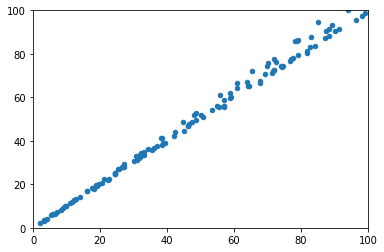

In [72]:
plt.scatter(df['xs'],df.res,s=20)
plt.xlim([0,100])
plt.ylim([0,100])

In [64]:
df=pd.DataFrame([xs,res]).transpose()
df.columns=['xs','res']
df=df[ df.res<20 ]
df

,xs,res
0,1.135468,0.709257
1,1.135468,0.709257


In [24]:
res

[0.0423985972034171]

In [18]:
temp_merged.iloc[100,:]

pep         YLSEVASGENK
cpxt_x           0.0421
pxt              0.0421
delta1_x       1.011179
delta2_x       1.135468
i0_x           0.189062
i1_x           0.312073
i2_x           0.260288
cpxt_y        -0.010379
delta1_y       1.011179
delta2_y       1.162891
i0_y           0.189062
i1_y           0.312073
i2_y           0.265473
Name: 100, dtype: object

In [20]:
(temp_merged.pxt[index]
,temp_merged.delta2_x[index]
,temp_merged.delta1_x[index]
,temp_merged.i1_x    [index]
,temp_merged.i0_x    [index]
,temp_merged.i2_x    [index])

(0.0421,
 1.13546809814628,
 1.01117894095416,
 0.312073332973675,
 0.189061735861562,
 0.260288264004882)

In [22]:
new_pxt(temp_merged.delta2_x[index],xs[-1],delta1_x,i1_x,i0_x,i2_x)

TypeError: new_pxt() missing 1 required positional argument: 'i2_x'

In [15]:
new_pxt(pxt,xs[-1],delta1_x,i1_x,i0_x,i2_x)

0.688166241036865

In [103]:

# df=pd.DataFrame()
# df['xs']=xs
# df['res']=res 
# df=df[(df.res> x+0.15*x) | (df.res< x+0.15-x)]
# plt.scatter(df['xs'],df.res)

In [28]:
df=pd.DataFrame([xs,res]).transpose()
df.columns=['xs','res']
# df=df[ (df.res<= x+0.15*x) ]
# plt.scatter(df['xs'],df.res,c='r')
df

,xs,res
0,1.135468,0.042399
1,1.146823,0.021352
2,1.158177,-0.000641
3,1.169532,-0.023645
4,1.180887,-0.047732
5,1.192242,-0.072979
6,1.203596,-0.099474
7,1.214951,-0.127310
8,1.226306,-0.156592
9,1.237660,-0.187435


In [105]:
df

,xs,res


In [106]:
xs

[0.0421,
 0.042520999999999996,
 0.042942,
 0.043363,
 0.043784,
 0.044205,
 0.044626,
 0.045047,
 0.045468,
 0.045889,
 0.04631,
 0.046730999999999995,
 0.047152,
 0.047573,
 0.047993999999999995,
 0.048415,
 0.048836,
 0.049256999999999995,
 0.049678,
 0.050099,
 0.050519999999999995,
 0.050941,
 0.051362,
 0.051782999999999996,
 0.052204,
 0.052625,
 0.053045999999999996,
 0.053467,
 0.053888,
 0.054308999999999996,
 0.05473,
 0.055151,
 0.055571999999999996,
 0.055993,
 0.056414,
 0.056835,
 0.057256,
 0.057677,
 0.058098,
 0.058519,
 0.05894,
 0.059361,
 0.059782,
 0.060203,
 0.060624,
 0.061045,
 0.06146599999999999,
 0.061887,
 0.062308,
 0.062729,
 0.0421,
 0.041679,
 0.041257999999999996,
 0.040837,
 0.040416,
 0.039994999999999996,
 0.039574,
 0.039153,
 0.038731999999999996,
 0.038311,
 0.03789,
 0.037469,
 0.037048,
 0.036627,
 0.036206,
 0.035785,
 0.035364,
 0.034943,
 0.034522,
 0.034101,
 0.03368,
 0.033259,
 0.032838,
 0.032417,
 0.031996,
 0.031575,
 0.031153999999999

In [107]:
res

[0.688166241036865,
 0.688085248851193,
 0.6880042145825964,
 0.6879231381982673,
 0.6878420196653643,
 0.6877608589510114,
 0.6876796560222989,
 0.6875984108462825,
 0.6875171233899839,
 0.6874357936203901,
 0.6873544215044539,
 0.6872730070090938,
 0.6871915501011938,
 0.6871100507476031,
 0.6870285089151367,
 0.6869469245705748,
 0.6868652976806631,
 0.6867836282121123,
 0.6867019161315988,
 0.6866201614057639,
 0.6865383640012142,
 0.6864565238845213,
 0.686374641022222,
 0.6862927153808182,
 0.6862107469267766,
 0.6861287356265289,
 0.6860466814464719,
 0.6859645843529669,
 0.6858824443123402,
 0.6858002612908831,
 0.6857180352548511,
 0.6856357661704646,
 0.685553454003909,
 0.6854710987213336,
 0.6853887002888526,
 0.6853062586725447,
 0.685223773838453,
 0.685141245752585,
 0.6850586743809124,
 0.6849760596893713,
 0.6848934016438619,
 0.6848107002102493,
 0.6847279553543615,
 0.6846451670419917,
 0.6845623352388968,
 0.6844794599107976,
 0.684396541023379,
 0.6843135785422896,